In [1]:
%matplotlib inline

# Extract histogram features

This example shows how to extract histogram features from tissue image.

Histogram features give a more detailed view than summary features
(`sphx_glr_auto_examples_image_compute_summary_features.py`) by
computing a histogram of each image channel and returning bin-counts for
each Visium spot.

In addition to `feature_name` and `channels` we can specify the
following `features_kwargs`:

> -   `bins` - number of bins of the histogram, default is 10.
> -   `v_range` - range on which values are binned, default is the whole
>     image range.

::: seealso
See `sphx_glr_auto_examples_image_compute_features.py` for general usage
of `squidpy.im.calculate_image_features`.
:::


In [15]:
import squidpy as sq
import seaborn as sns

Lets load the fluorescence Visium dataset and calculate bin-counts (3
bins) of channels 0 and 1.


In [4]:
# get spatial dataset including high-resolution tissue image
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

# calculate histogram features and save in key "histogram_features"
sq.im.calculate_image_features(
    adata,
    img,
    features="histogram",
    features_kwargs={"histogram": {"bins": 3, "channels": [0, 1]}},
    key_added="histogram_features",
    n_jobs=8
)


 59%|█████████████▌         | 415/704 [00:28<00:19, 14.82/s]


100%|███████████████████████| 704/704 [00:44<00:00, 15.65/s]


The result is stored in `adata.obsm['histogram_features']`.


In [6]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'histogram_features'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obsm["histogram_features"].head()

,histogram_ch-0_bin-0,histogram_ch-0_bin-1,histogram_ch-0_bin-2,histogram_ch-1_bin-0,histogram_ch-1_bin-1,histogram_ch-1_bin-2
AAACGAGACGGTTGAT-1,28201,1649,2191,32041,0,0
AAAGGGATGTAGCAAG-1,30072,748,1221,31510,529,2
AAATGGCATGTCTTGT-1,29032,2252,757,30793,1002,246
AAATGGTCAATGTGCC-1,28672,2411,958,32041,0,0
AAATTAACGGGTAGCT-1,29996,1116,929,31367,674,0


Use `squidpy.pl.extract` to plot the histogram features on the tissue
image or have a look at [our interactive visualisation
tutorial](../../external_tutorials/tutorial_napari.ipynb) to learn how
to use our interactive `napari` plugin. With these features we can e.g.
appreciate the detailed distribution of intensity values of channel 0
(DAPI stain) on the different bins.


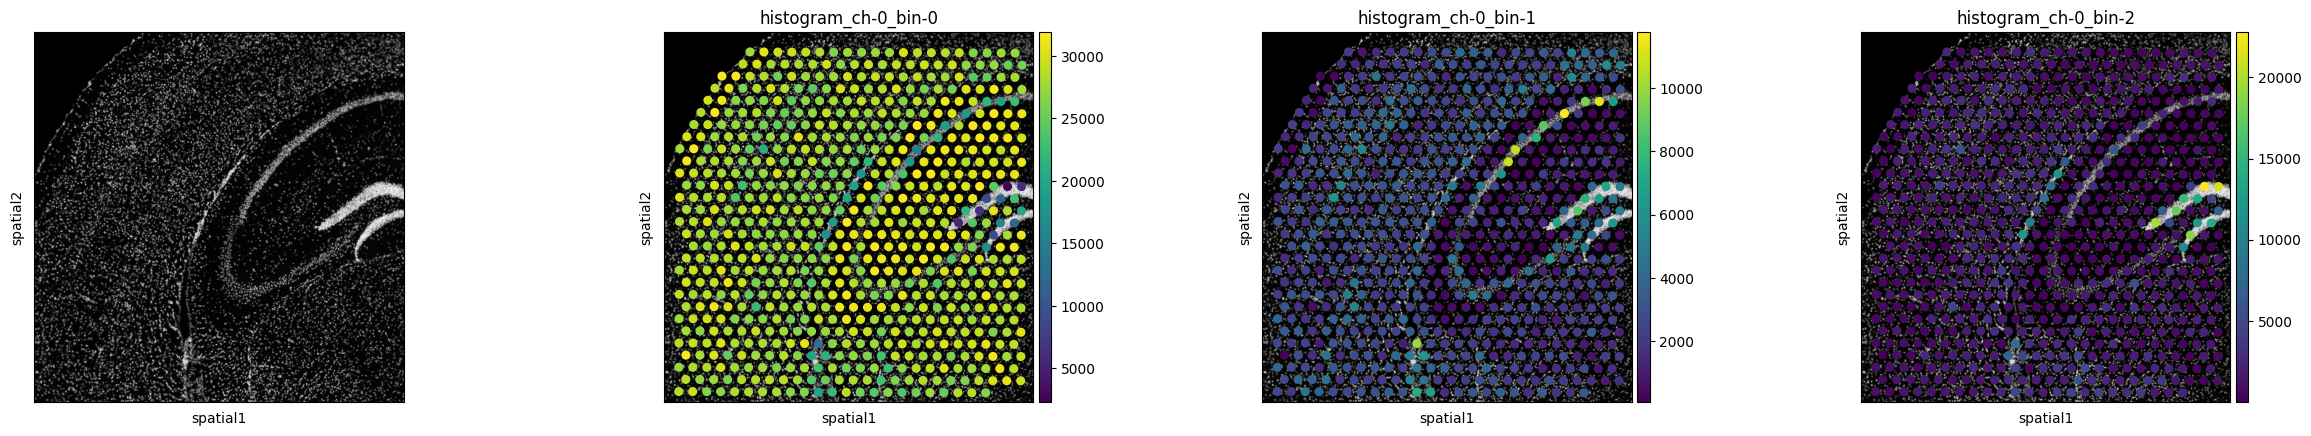

In [7]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "histogram_features"),
    color=[None, "histogram_ch-0_bin-0", "histogram_ch-0_bin-1", "histogram_ch-0_bin-2"],
    img_cmap="gray",
)

> IDF: lets try different more bins

In [9]:
sq.im.calculate_image_features(
    adata,
    img,
    features="histogram",
    features_kwargs={"histogram": {"bins": 10, "channels": [0, 1]}},
    key_added="histogram_features_bin10",
    n_jobs=8
)


 55%|████████████▌          | 384/704 [00:23<00:19, 16.63/s]


100%|███████████████████████| 704/704 [00:41<00:00, 16.86/s]


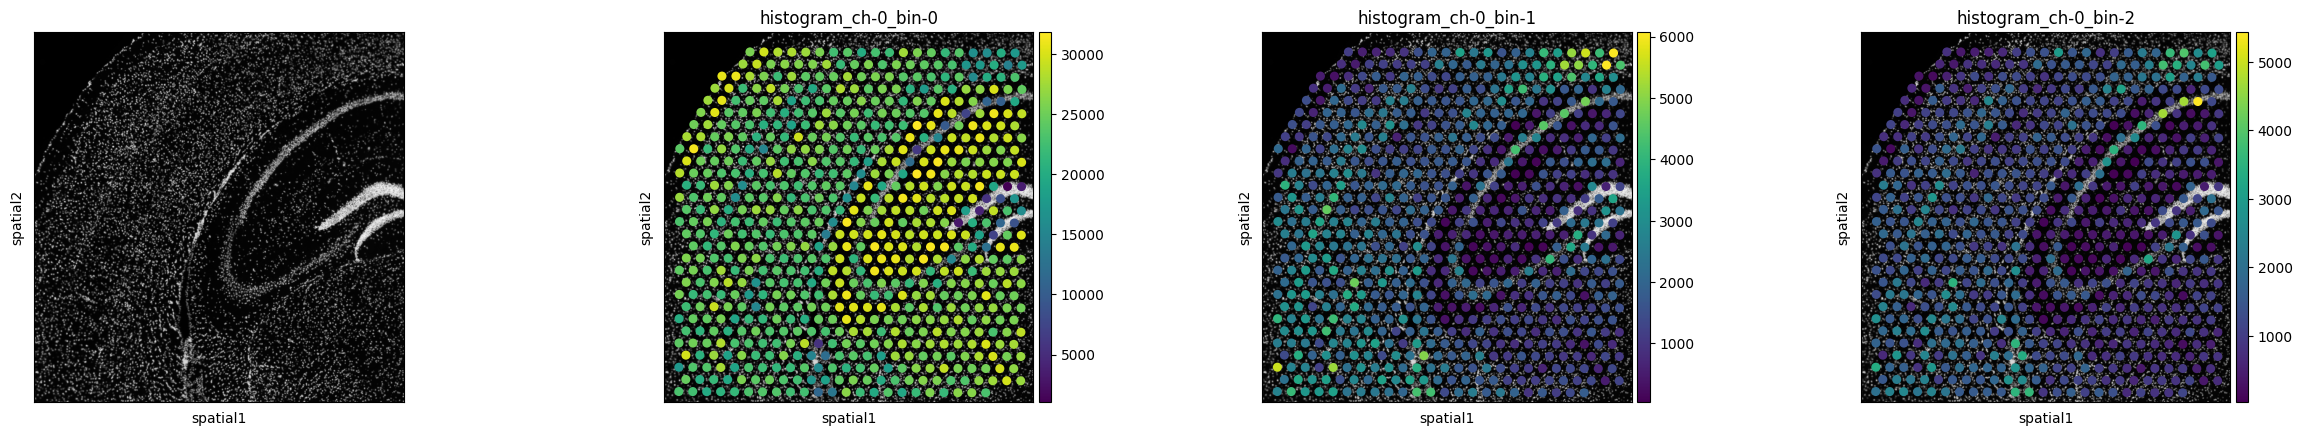

In [14]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, 'histogram_features_bin10'),
    color=[None, 'histogram_ch-0_bin-0', 'histogram_ch-0_bin-1', 'histogram_ch-0_bin-2'],
    img_cmap='gray'
)

> IDF: lets try a value range

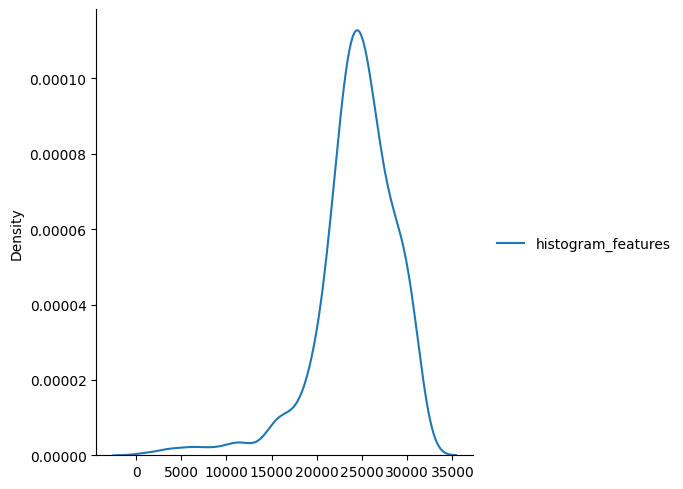

In [16]:
# Make a histogram
_ = sns.displot(
    {
        "histogram_features": adata.obsm["histogram_features"]["histogram_ch-0_bin-0"],
    },
    kind="kde",
)

In [23]:
sq.im.calculate_image_features(
    adata,
    img,
    features='histogram',
    features_kwargs={
        "histogram": {
            "bins": 3, 
            "channels": [0, 1], 
            'v_range': [15000, 20000]
        }
    },
    key_added="histogram_features_ranged",
    n_jobs=8
)



  0%|                                 | 0/704 [00:00<?, ?/s]

  0%|                         | 1/704 [00:03<37:54,  3.24s/]

  0%|                         | 2/704 [00:03<17:31,  1.50s/]

  0%|                         | 3/704 [00:03<10:24,  1.12/s]

  1%|▎                        | 8/704 [00:03<02:36,  4.44/s]

  2%|▍                       | 11/704 [00:04<02:07,  5.42/s]

  2%|▌                       | 16/704 [00:04<01:12,  9.50/s]

  3%|▋                       | 19/704 [00:04<01:14,  9.14/s]

  4%|▊                       | 25/704 [00:04<00:46, 14.48/s]

  4%|▉                       | 28/704 [00:05<00:55, 12.13/s]

  5%|█▏                      | 34/704 [00:05<00:46, 14.30/s]

  5%|█▎                      | 37/704 [00:05<00:47, 14.17/s]

  6%|█▍                      | 41/704 [00:05<00:38, 17.15/s]

  6%|█▌                      | 44/704 [00:06<00:45, 14.36/s]

  7%|█▌                      | 46/704 [00:06<00:45, 14.54/s]

  7%|█▋                      | 50/704 [00:06<00:37, 17.24/s]

  8%|█

 54%|████████████▎          | 377/704 [00:25<00:16, 20.33/s]

 54%|████████████▍          | 380/704 [00:26<00:20, 15.84/s]

 55%|████████████▌          | 385/704 [00:26<00:16, 18.82/s]

 55%|████████████▋          | 388/704 [00:26<00:20, 15.76/s]

 56%|████████████▊          | 391/704 [00:26<00:17, 17.71/s]

 56%|████████████▊          | 394/704 [00:26<00:16, 19.20/s]

 56%|████████████▉          | 397/704 [00:27<00:20, 15.31/s]

 57%|█████████████          | 400/704 [00:27<00:18, 16.66/s]

 57%|█████████████▏         | 403/704 [00:27<00:19, 15.43/s]

 58%|█████████████▎         | 406/704 [00:27<00:18, 16.48/s]

 58%|█████████████▎         | 408/704 [00:27<00:17, 16.97/s]

 58%|█████████████▍         | 411/704 [00:28<00:21, 13.59/s]

 59%|█████████████▌         | 415/704 [00:28<00:18, 16.01/s]

 59%|█████████████▋         | 418/704 [00:28<00:15, 18.44/s]

 60%|█████████████▊         | 421/704 [00:28<00:19, 14.75/s]

 60%|█████████████▊         | 424/704 [00:28<00:16, 16.79/s]

 61%|███

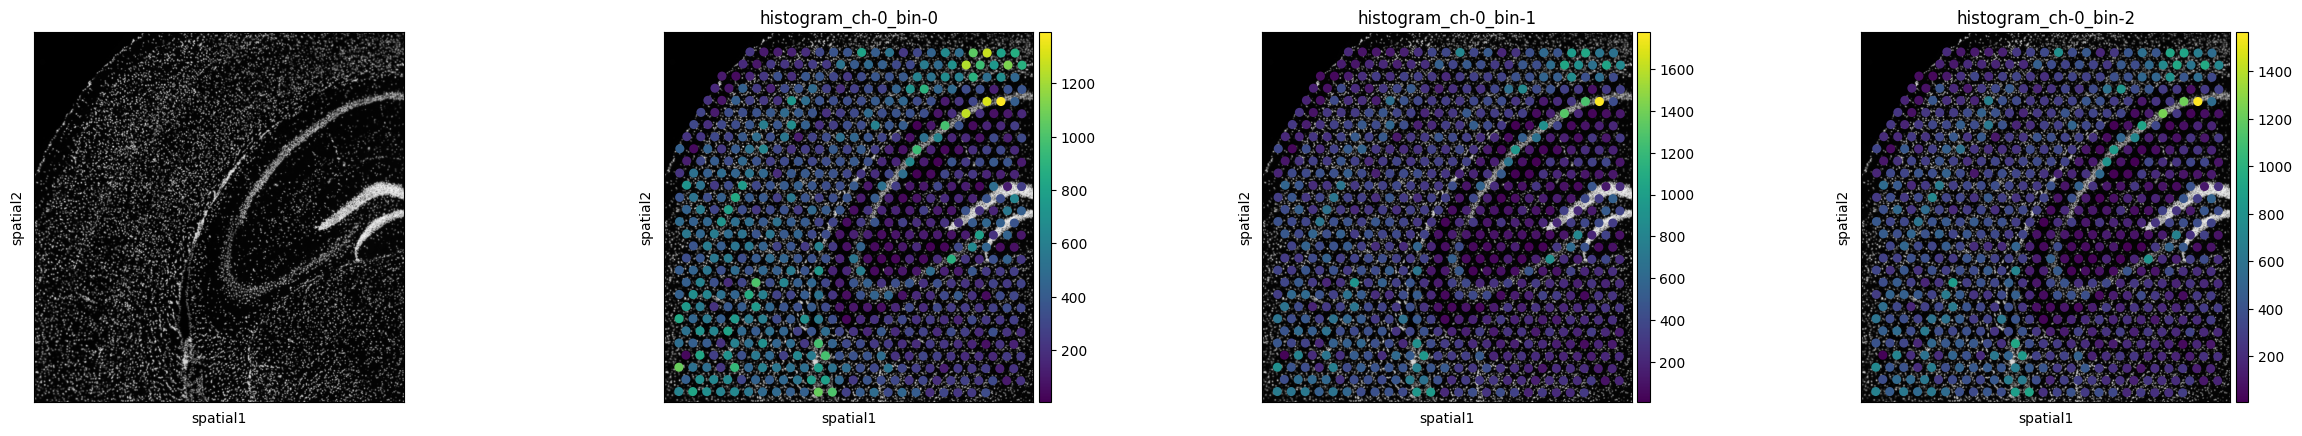

In [24]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, 'histogram_features_ranged'),
    color=[None, 'histogram_ch-0_bin-0', 'histogram_ch-0_bin-1', 'histogram_ch-0_bin-2'],
    img_cmap='gray'
)